In [1]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import seaborn as sns

In [18]:
data = np.load("../data/train/2013-11-01.npy")
train_raw = np.load("../data/train_raw.npy")
val_raw = np.load("../data/val_raw.npy")
train = np.load("../data/train.npy")
val = np.load("../data/val.npy")

#### We have 1 datapoint per 10 minutes, resulting in 144 data points per day

In [3]:
data.shape

(144, 100, 100)

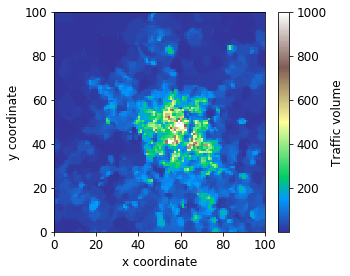

In [6]:
plt.rcParams.update({'font.size': 12})  
plt.figure(figsize=(5, 4))
dots1 = data[96]  # 15:00 UTC,  16:00 local Milan time
plt.pcolormesh(dots1, cmap='terrain', vmin=dots1.min(), vmax=1000)
plt.colorbar(label="Traffic volume")


plt.ylabel("y coordinate")
plt.xlabel("x coordinate")

plt.tight_layout()

plt.savefig("figa.pdf")


plt.show()

In [6]:
def plot_cell(cell_data, ax=None):
                        #  24 hours,  10 minute steps 
    x_grid = np.arange(0, cell_data.shape[0] / 6, 1 / 6)
    
    if ax is None:
        ax = plt.axes()
    ax.plot(x_grid, cell_data)

In [12]:
def plot_various_cells(data):
    cell_coords = [
        [(45, 58), (47, 55), (50, 60)],
        [(45, 65), (55, 65), (55, 55)]
    ]
    fig, axis_grid = plt.subplots(2, 3, sharey=True, figsize=(18, 8))

    for line_coords, axis in zip(cell_coords, axis_grid):
        for coords, ax in zip(line_coords, axis):
            cell_data = data[:, coords[0], coords[1]]

            plot_cell(cell_data, ax)

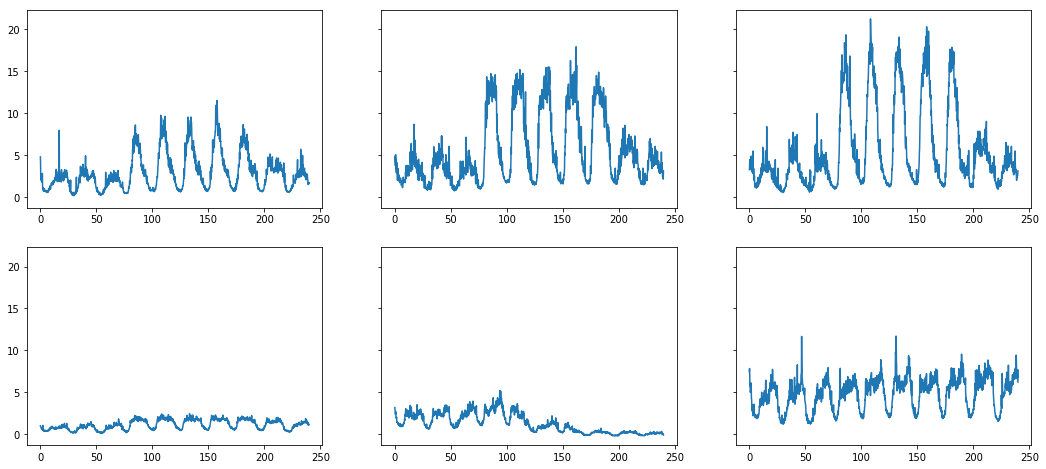

In [20]:
plot_various_cells(train[:1440])

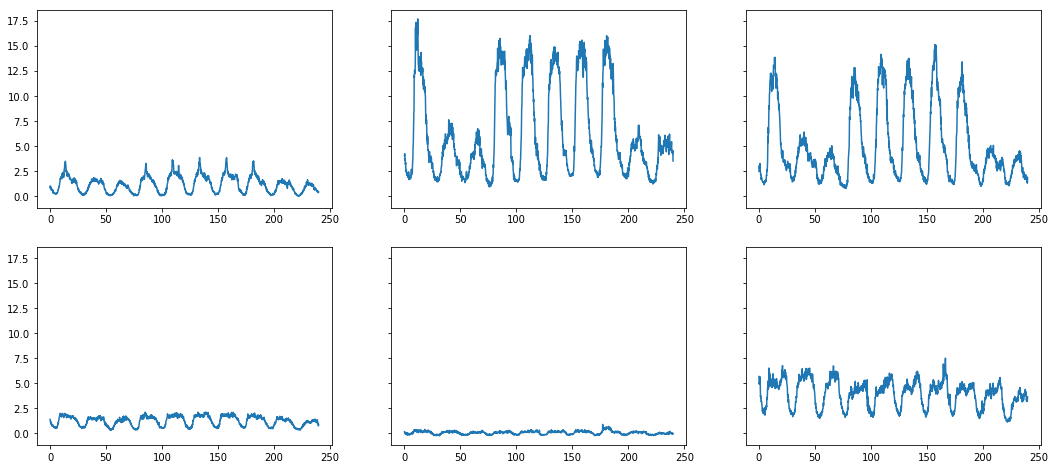

In [19]:
plot_various_cells(val[:1440])

## Data Range and Outlier analysis

In [36]:
import scipy.stats as sts

def stats(data):
    print(f"mean: {data.mean()}")
    print(f"std: {data.std()}")
    print(f"min: {data.min()}")
    print(f"max: {data.max()}")
    

In [32]:
stats(data)

In [38]:
print("TRAIN:")
stats(train_raw)
print("\nVAL:")
stats(val_raw)

TRAIN:
mean: 67.61768898039853
std: 132.47248595705986
min: 0.0
max: 8044.070569441475

VAL:
mean: 58.91781573321698
std: 112.66105591336199
min: 0.0
max: 5752.094179354247


In [74]:
from scipy.stats import iqr

# Lets investigate outliers using Tukey's fences
def analize_iqr_outliers(volumes):
    iqrange = iqr(volumes)
    first_quartile = np.quantile(volumes, 0.25)
    third_quartile = np.quantile(volumes, 0.75)

    print("Interquartile range: {0}".format(iqrange))
    print("First quartile: {0}".format(first_quartile))
    print(f"third_quartile: {third_quartile}")

    k = 1.5
    outlier_threshold = third_quartile + k * iqrange

    outliers = volumes[volumes > outlier_threshold]

    print("There are: {0} points considered as outliers".format(len(outliers)))
    print("Which makes: {0}% of the data".format(len(outliers) / np.size(volumes) * 100))

In [75]:
analize_iqr_outliers(data)

Interquartile range: 51.93908519555043
First quartile: 10.70288904168552
third_quartile: 62.64197423723596
There are: 141291 points considered as outliers
Which makes: 9.811875% of the data


**Amplitude distributions in the central area**

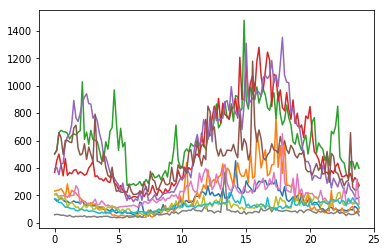

In [64]:
central_range_x = np.arange(45, 55)
central_range_y = np.arange(55, 65)
for x, y in zip(central_range_x, central_range_y):
    plot_cell(data[:, x, y])

In [76]:
central_region = data[:, central_range_x[0]:central_range_x[-1], central_range_y[0]:central_range_y[-1]]
analize_iqr_outliers(central_region)

Interquartile range: 274.3909521627498
First quartile: 188.87529075057336
third_quartile: 463.26624291332314
There are: 662 points considered as outliers
Which makes: 5.675582990397805% of the data


**Seems tempting to remove outliers:**

In [41]:
def plot_histograms(data):
    plt.figure(figsize=(15, 4))

    plt.subplot(1, 2, 1)
    sns.distplot(data.reshape(np.size(data)))

    plt.subplot(1, 2, 2)
    outliers_removed = data[data < 1200]
    sns.distplot(outliers_removed)

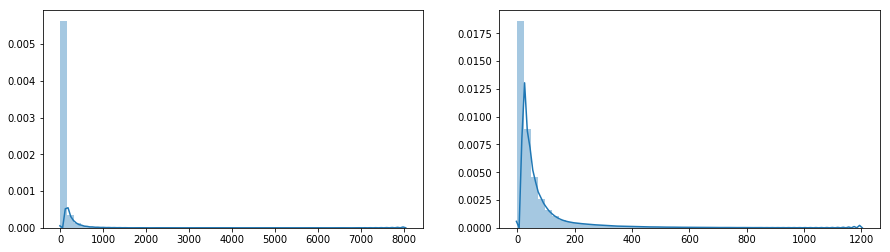

In [42]:
plot_histograms(train_raw)

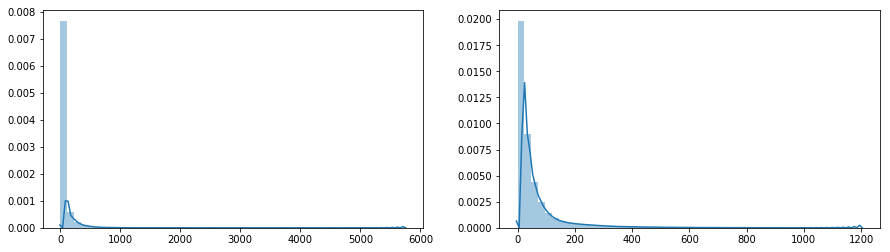

In [43]:
plot_histograms(val_raw)

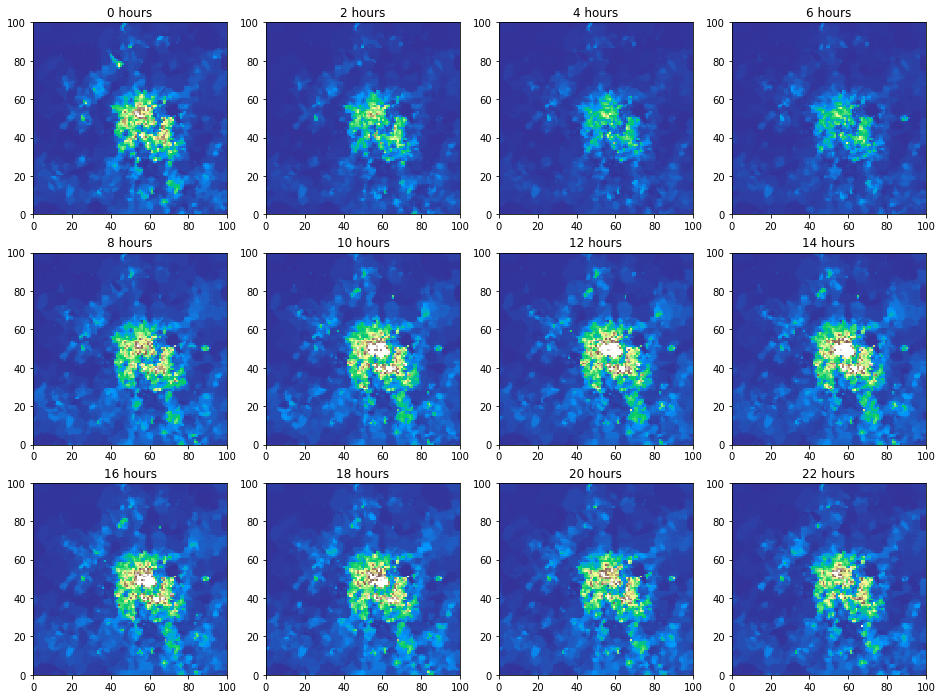

In [40]:
plt.figure(figsize=(16, 12))

for i in range(12): 
    index = i*12
    dots1 = val_raw[index]  # 96 is 15:00 UTC,  16:00 local Milan time
    
    plt.subplot(3, 4, i+1)
    plt.pcolormesh(dots1, cmap='terrain', vmin=dots1.min(), vmax=1000)
    
    hour = index // 6
    plt.title(f"{hour} hours")
#     plt.colorbar(label="Traffic volume")
# 
# 
